<a href="https://colab.research.google.com/github/singhal373/Human-Activity-Recognition-ML/blob/main/Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
# Imports


from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold, f_classif, SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix , classification_report
from sklearn.ensemble import  ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from yellowbrick.classifier import ClassificationReport
from yellowbrick.datasets import load_occupancy
from yellowbrick.classifier import ROCAUC
from sklearn.naive_bayes import GaussianNB
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
class HumanActivityRecognition():
    def __init__(self):
        Xtrain=pd.read_csv("data/Train/X_train.txt",sep=" ",header=None)
        Xtest=pd.read_csv("data/Test/X_test.txt",sep=" ",header=None)
        Ytrain=pd.read_csv("data/Train/y_train.txt",sep=" ",header=None)
        Ytest=pd.read_csv("data/Test/y_test.txt",sep=" ",header=None)
        self.dftest=pd.concat([Xtest,Ytest],axis=1,ignore_index=True)
        self.dftrain=pd.concat([Xtrain,Ytrain],axis=1,ignore_index=True)
        self.data=pd.concat([self.dftrain,self.dftest],axis=0,ignore_index=True)
        self.X=self.data.iloc[:,:-1]
        self.Y=self.data.iloc[:,-1]

    def Logistic(self,X,Y):
        X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0, train_size = 0.7)
        clf=LogisticRegression(max_iter=2500,C=1.0,penalty='l2')
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        print(accuracy_score(y_test,y_pred))
        print(classification_report(y_test,y_pred))

    def RF(self,X,Y):
        X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0, train_size = 0.7)
        clf = RandomForestClassifier(random_state=0,max_depth=80,n_estimators=1000)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        print(accuracy_score(y_test,y_pred))
        print(classification_report(y_test,y_pred))

    def ET(self,X,Y):
        X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0, train_size = 0.7)
        clf = ExtraTreesClassifier(random_state=0, n_estimators=340)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        print(accuracy_score(y_test,y_pred))
        print(classification_report(y_test,y_pred))
    
    def GNB(self,X,Y):
        X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0, train_size = 0.7)
        clf = GaussianNB()
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        print(accuracy_score(y_test,y_pred))
        print(classification_report(y_test,y_pred))

    def GridRF(self,X,Y,plot=False):
        X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0, train_size = 0.7)
        param_grid = {'max_depth': [80, 90, 100, 110],'n_estimators': [100, 200, 1000]}
        rf = RandomForestClassifier(random_state=1)
        grid = GridSearchCV(estimator = rf, param_grid = param_grid, verbose=1,refit = True,return_train_score=True)
        grid.fit(X_train, y_train) 
        print(grid.best_params_) 
        y_pred=grid.predict(X_test)
        print(accuracy_score(y_test,y_pred))
        print(classification_report(y_test,y_pred))
        return grid, param_grid['max_depth'], param_grid['n_estimators']

    def SVM(self,X,Y):
        X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0, train_size = 0.7)
        clf = SVC(C=100,gamma=0.01) 
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        print(accuracy_score(y_test,y_pred))
        print(classification_report(y_test,y_pred))
        # return classification_report(y_test,y_pred)

    def Lasso_reg(self):
        selector = SelectFromModel(estimator=LassoCV(max_iter=10000)).fit(self.X, self.Y)
        self.X=selector.transform(self.X)
        print("Shape after Lasso",self.X.shape)
        self.Logistic(self.X,self.Y)

    def ridge_reg(self):
        selector = SelectFromModel(estimator=Ridge()).fit(self.X, self.Y)
        self.X=selector.transform(self.X)
        print("Shape after Ridge",self.X.shape)
        self.Logistic(self.X,self.Y)

    def pca(self,X):
        pca=PCA(n_components=200,random_state=0)
        X_pca=pca.fit(X).transform(X)
        return X_pca

    def tsne(self):
        tsn=TSNE(random_state=0)
        X_sn=tsn.fit_transform(self.X)
        # sns.scatterplot(X_sn[:,0], X_sn[:,1], hue=np.transpose(self.Y), legend='full',palette=sns.color_palette("hls", 12))
        # plt.legend(title='Labels',loc='upper right')#,labels=["1--> WALKING","2--> WALKING_UPSTAIRS","3--> WALKING_DOWNSTAIRS","4--> SITTING","5--> STANDING","6--> LAYING","7--> STAND_TO_SIT","8--> SIT_TO_STAND","9--> SIT_TO_LIE","10--> LIE_TO_SIT","11--> STAND_TO_LIE","12--> LIE_TO_STAND"])
        # plt.show()
        self.Logistic(X_sn,self.Y)

    def tsne_pca(self):
        X=self.pca(self.X)
        tsn=TSNE(random_state=0)
        X_sn=tsn.fit_transform(X)
        # sns.scatterplot(X_sn[:,0], X_sn[:,1], hue=np.transpose(self.Y), legend='full',palette=sns.color_palette("hls", 12))
        # plt.legend(title='Labels',loc='upper right')#,labels=["1--> WALKING","2--> WALKING_UPSTAIRS","3--> WALKING_DOWNSTAIRS","4--> SITTING","5--> STANDING","6--> LAYING","7--> STAND_TO_SIT","8--> SIT_TO_STAND","9--> SIT_TO_LIE","10--> LIE_TO_SIT","11--> STAND_TO_LIE","12--> LIE_TO_STAND"])
        # plt.show()
        self.Logistic(X_sn,self.Y)

    def heatSVM(self,X,Y):
        # classes=[1,2,3,4,5,6,7,8,9,10,11,12]
        X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0, train_size = 0.7)
        clf = SVC(C=100,gamma=0.01) 
        fig, ax = plt.subplots()
        ax.set_ylabel('Class')
        ax.set_xlabel('Score')
        visualizer = ClassificationReport(clf,ax=ax)
        visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
        visualizer.score(X_test, y_test)        # Evaluate the model on the test data
        visualizer.show()                       # Finalize and show the figure
      
    def confusion_matrix_heatmap(self, X, Y):
      X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0, train_size = 0.7)
      clf = SVC(C=100,gamma=0.01) 
      clf.fit(X_train, y_train)
      YPred = clf.predict(X_test)
      matrix = confusion_matrix(y_test, YPred)
      matrix = list(np.array(matrix)[:6,:6])
      plt.figure(figsize=(14,10))
      plt.title("SVM confusion matrix (Activity)")
      sns.heatmap(matrix, annot=True, fmt='g', cmap='Blues', xticklabels=[encodeActivity(i+1) for i in range(6)], yticklabels=[encodeActivity(i+1) for i in range(6)])
      plt.xticks(rotation=30)
      plt.yticks(rotation=30)
      plt.show()
    
    def mean_x_axis_acceleration_plot(self):
      plt.figure(figsize=(10, 8))
      ax = sns.boxplot(y= self.dftrain[558], x = self.dftrain[561])
      ax.set_xticklabels(ax.get_xticklabels(),rotation=15)
      plt.xlabel("Activity")
      plt.ylabel("Mean acceleration")
      plt.show()
    
    def multilayer_perceptron(self, X, Y):
      X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0, train_size = 0.7)
      clf = MLPClassifier(learning_rate_init=0.01, hidden_layer_sizes=(256, 128), random_state=0, activation='relu', momentum = 1)
      clf.fit(X_train, y_train)
      y_pred = clf.predict(X_test)
      print(accuracy_score(y_test,y_pred))
      print(classification_report(y_test,y_pred))


    # def plot_classification_report(self,cr, title='Classification report ', with_avg_total=False, cmap=plt.cm.Blues):
    #     lines = cr.split('\n')
    #     # print(lines)
    #     classes = []
    #     plotMat = []
    #     for line in lines[2 : (len(lines) - 3)]:
    #         # print(line)
    #         t = line.split()
    #         if len(t)==0:
    #             break
    #         classes.append(t[0])
    #         v = [float(x) for x in t[1: len(t) - 1]]
    #         plotMat.append(v)
    #     if with_avg_total:
    #         aveTotal = lines[len(lines) - 1].split()
    #         classes.append('avg/total')
    #         vAveTotal = [float(x) for x in t[1:len(aveTotal) - 1]]
    #         plotMat.append(vAveTotal)
    #     # plotMat = np.array(plotMat,dtype=float)
    #     plt.imshow(plotMat, interpolation='nearest', cmap=cmap)
    #     plt.title(title)
    #     plt.colorbar()
    #     x_tick_marks = np.arange(3)
    #     y_tick_marks = np.arange(len(classes))
    #     plt.xticks(x_tick_marks, ['precision', 'recall', 'f1-score'], rotation=45)
    #     plt.yticks(y_tick_marks, classes)
    #     plt.tight_layout()
    #     plt.ylabel('Classes')
    #     plt.xlabel('Measures')
    #     plt.show()

    def RoCAuC(self,X,Y):
        X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0, train_size = 0.7)
        clf = SVC(C=100,gamma=0.01) 
        oz = ROCAUC(clf)#,classes=["1","2","3","4","5","6","7","8","9","10","11","12"])
        oz.fit(X_train, y_train)
        oz.score(X_test, y_test)
        oz.show()

    # def ROC(self,X,Y):
    #     X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0, train_size = 0.7)
    #     clf = SVC(C=100,gamma=0.01) 
    #     clf.fit(X_train, y_train)
    #     y_pred = clf.predict(X_test)
    #     y_pred=y_pred.reshape(len(y_pred),1)
    #     skplt.metrics.plot_roc_curve(y_test, y_pred)
    #     plt.show()


In [5]:
# Data Preprocessing and Visualization

class Data_Processor:

  def __init__(self):
    self.data= None
    self.y = None
    self.X = None
    self.label = {"1": "WALKING","2":"WALKING_UPSTAIRS","3": "WALKING_DOWNSTAIRS","4":"SITTING","5":"STANDING","6":"LAYING","7":"STAND_TO_SIT","8": "SIT_TO_STAND","9":"SIT_TO_LIE","10":"LIE_TO_SIT","11":"STAND_TO_LIE","12":"LIE_TO_STAND" }      
    
    self.read_data()
    self.remove_missing_values()
    self.shuffle_rows()
    # self.count_plot()

  def remove_missing_values(self):
    self.data.dropna(inplace=True) 
  
  def normalize_values(self):
    pass

  def shuffle_rows(self, seed=2):
    self.data = self.data.sample(frac=1, random_state = seed )
  
  def count_plot(self):
    # g = self.data.iloc[:,-1].value_counts()
    # plot_data=[]
    # for i in range(1,13):
    #   k=[ self.label[str(i)], g[i]]
    #   plot_data.append(k)
    # df = pd.DataFrame(plot_data, columns = ['Activity', 'Count']) 
    # print(df)
    sns.countplot(x=561,data=self.data, palette = "copper")
    plt.title('Distribution')
    plt.xlabel("Activity Type")
    plt.show()

  def read_data(self):
    drive.mount('/content/drive')
    path = "/content/drive/My Drive/Project_ML/data/"
    Xtrain=pd.read_csv(path + "Train/X_train.txt",sep=" ",header=None)
    Xtest=pd.read_csv(path + "Test/X_test.txt",sep=" ",header=None)
    Ytrain=pd.read_csv(path + "Train/y_train.txt",sep=" ",header=None)
    Ytest=pd.read_csv(path +"Test/y_test.txt",sep=" ",header=None)
    dftest=pd.concat([Xtest,Ytest],axis=1,ignore_index=True)
    dftrain=pd.concat([Xtrain,Ytrain],axis=1,ignore_index=True)
    data=pd.concat([dftrain,dftest],axis=0,ignore_index=True)
    self.data = data
    self.y = data.iloc[:,-1]
    data.drop(data.columns[len(data.columns)-1], axis=1, inplace=True)
    self.X = data

  def removing_low_variance_features(self, apply=False):
    X = self.X
    X_before = self.X
    sel = VarianceThreshold(threshold=(0.09))
    X = sel.fit_transform(X)
    print(sel)
    X_train, X_test, y_train, y_test = train_test_split(
            X, self.y, stratify=self.y, random_state=0, train_size = 0.7
    )

    clf = LogisticRegression(random_state=0, max_iter = 2500)
    # clf = Pipeline([('feature_selection', SelectFromModel(LinearSVC(penalty="l1"))),('classification', RandomForestClassifier())])
    clf.fit(X_train, y_train)
    print("After removing features with low variance: " + str(clf.score(X_test, y_test)))

    X_train, X_test, y_train, y_test = train_test_split(
            X_before, self.y, stratify=self.y, random_state=0, train_size = 0.7
    )

    clf = LogisticRegression(random_state=0, max_iter = 2500)
    clf.fit(X_train, y_train)
    print("Before removing features with low variance: " +  str(clf.score(X_test, y_test)))

    if (apply):
      self.X = X
      self.data = pd.concat([X, self.y], axis=1)

  def Anova(self, apply = False, select= 400):
    X_before = self.X
    y = self.y
    X = SelectKBest(f_classif, k=select).fit_transform(X_before, y)

    X_train, X_test, y_train, y_test = train_test_split(
                X, y, stratify=self.y, random_state=0, train_size = 0.7)

    clf = LogisticRegression(random_state=0, max_iter = 2500)
    clf.fit(X_train, y_train)
    print("Accuracy after performing Anova: " + str(clf.score(X_test, y_test)))
    if (apply):
      self.X = X
      self.data = pd.concat([X, self.y], axis=1)
      
  def PCA(self, apply=False, n_components=200):
    pca = PCA(n_components)
    fit = pca.fit(self.X)
    y=self.y
    x=pca.transform(self.X)
    X_train, X_test, y_train, y_test = train_test_split(
                    x, y, stratify=y, random_state=0, train_size = 0.7)

    clf = LogisticRegression(random_state=0, max_iter = 2500)
    clf.fit(X_train, y_train)
    print("Accuracy after performing PCA: " + str(clf.score(X_test, y_test)))

    var = pca.explained_variance_ / np.sum(pca.explained_variance_)
    cum_var = np.cumsum(var)
    plt.figure(1, figsize=(6,4))
    plt.clf()
    plt.plot(cum_var, linewidth= 3)
    plt.axis('tight')
    plt.grid()
    plt.xlabel("No of Components")
    plt.ylabel("Cumulative Variance")
    plt.show()
    
    if (apply):
      self.X = x
      self.data = pd.concat([X, self.y], axis=1)

In [13]:
processor = Data_Processor()
Models = HumanActivityRecognition()
X_pca=Models.pca(Models.X)

print("--------------------------GNB without PCA------------------------------------------------")
Models.GNB(Models.X,Models.Y)
print("------------GNB with PCA----------------")
Models.GNB(X_pca,Models.Y)
print("------------------------- RF without PCA ------------------------------------------------")
Models.RF(Models.X,Models.Y)
print("----------- RF with PCA ----------------")
Models.RF(X_pca,Models.Y)
print("------------------------- ET without PCA ------------------------------------------------")
Models.ET(Models.X,Models.Y)
print("----------- ET with PCA ----------------")
Models.ET(X_pca,Models.Y)
print("--------------------------MLP without PCA------------------------------------------------")
Models.multilayer_perceptron(Models.X,Models.Y)
print("------------MLP with PCA----------------")
Models.multilayer_perceptron(X_pca,Models.Y)
print("------------------------- LR without PCA ------------------------------------------------")
Models.Logistic(Models.X,Models.Y)
print("----------- LR with PCA ----------------")
Models.Logistic(X_pca,Models.Y)
print("--------------------------SVM without PCA------------------------------------------------")
Models.SVM(Models.X,Models.Y)
print("------------SVM with PCA--------------")
Models.SVM(X_pca,Models.Y)

Models.confusion_matrix_heatmap(Models.X, Models.Y)
Models.mean_x_axis_acceleration_plot()
Models.heatSVM(X_pca,Models.Y)
Models.RoCAuC(X_pca,Models.Y)

# temp.ROC(X_pca,temp.Y)
# sampleClassificationReport=temp.SVM(X_pca,temp.Y)
# temp.plot_classification_report(sampleClassificationReport)


FileNotFoundError: ignored

# **Comparison Plot (Bar Graphs)**

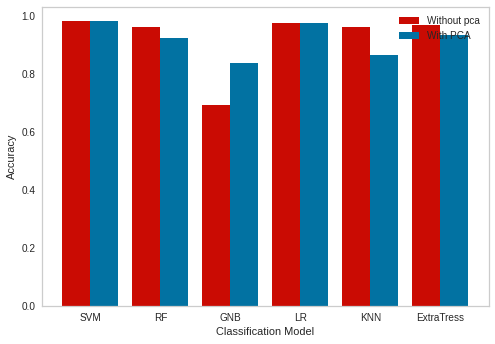

In [14]:
# without pca/// with pCA
data={
"Without pca":[0.9820067093626106,0.963098505641964,0.6944190301921317,0.9762122598353157,0.962183592,0.9677124183],
"With PCA":[0.9826166514181153,0.9225373589508996,0.8371454711802379,0.9759072888075633,0.86590765,0.933772411],
}
# SVM,RF,GNB,LR,KNN,Extratrees
def bar_plot(ax, data, colors=None, total_width=0.8, single_width=1, legend=True):
    """Draws a bar plot with multiple bars per data point.
    Parameters
    ----------
    ax : matplotlib.pyplot.axis
        The axis we want to draw our plot on.
    data: dictionary
        A dictionary containing the data we want to plot. Keys are the names of the
        data, the items is a list of the values.

        Example:
        data = {
            "x":[1,2,3],
            "y":[1,2,3],
            "z":[1,2,3],
        }
    colors : array-like, optional
        A list of colors which are used for the bars. If None, the colors
        will be the standard matplotlib color cyle. (default: None)
    total_width : float, optional, default: 0.8
        The width of a bar group. 0.8 means that 80% of the x-axis is covered
        by bars and 20% will be spaces between the bars.
    single_width: float, optional, default: 1
        The relative width of a single bar within a group. 1 means the bars
        will touch eachother within a group, values less than 1 will make
        these bars thinner.
    legend: bool, optional, default: True
        If this is set to true, a legend will be added to the axis.
    """
    # Check if colors where provided, otherwhise use the default color cycle
    if colors is None:
        colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
    # Number of bars per group
    n_bars = len(data)
    # The width of a single bar
    bar_width = total_width / n_bars
    # List containing handles for the drawn bars, used for the legend
    bars = []
    # Iterate over all data
    for i, (name, values) in enumerate(data.items()):
        # The offset in x direction of that bar
        x_offset = (i - n_bars / 2) * bar_width + bar_width / 2

        # Draw a bar for every value of that type
        for x, y in enumerate(values):
            bar = ax.bar(x + x_offset, y, width=bar_width * single_width, color=colors[i % len(colors)])

        # Add a handle to the last drawn bar, which we'll need for the legend
        bars.append(bar[0])
    # Draw legend if we need
    if legend:
        ax.legend(bars, data.keys())
    ax.grid(False)
    ax.set_ylabel('Accuracy')
    ax.set_xlabel('Classification Model')
    
fig, ax = plt.subplots()
bar_plot(ax, data, total_width=.8, single_width=1,legend=True,colors=["r","b"])
plt.xticks(range(6), ["SVM", "RF", "GNB", "LR", "KNN","ExtraTress"])
plt.show()